NSEI Stock Close day Prediction using LSTM and ARIMA.

Here, I have used data in CSV format fetched from Yahoo Finance for the last 5 years (2019 to 2024). I have tried using two different models(LSTM and ARIMA) to predict the closing price of the NSEI stock.

Packages used:
- Pandas
- Numpy
- Matplotlib
- LSTM
- Keras
- ARIMA

Here, I tried to predict the closing price of NSEI stock using LSTM and ARIMA models. The data is first preprocessed and then fed into the LSTM model. The model is trained for 1000 epochs for prediction. The prediction results are then plotted on a graph.
Thank you.

Harsh.

#LSTM

In [72]:
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib
from sklearn.preprocessing import MinMaxScaler
from keras.layers import LSTM, Dense, Dropout
from sklearn.model_selection import TimeSeriesSplit
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.dates as mandates
from sklearn.preprocessing import MinMaxScaler
from sklearn import linear_model
from keras.models import Sequential
from keras.layers import Dense
import keras.backend as K
from keras.callbacks import EarlyStopping
from keras.optimizers import Adam
from keras.models import load_model
from keras.layers import LSTM
from tensorflow.keras.utils import plot_model
import yfinance as yf


In [73]:
df = yf.download("^NSEI", period="5y", interval="1d")

[*********************100%%**********************]  1 of 1 completed


In [74]:
df

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2019-03-28,11463.650391,11588.500000,11452.450195,11570.000000,11570.000000,527700
2019-04-01,11665.200195,11738.099609,11644.750000,11669.150391,11669.150391,379600
2019-04-02,11711.549805,11729.349609,11655.849609,11713.200195,11713.200195,386100
2019-04-03,11735.299805,11761.000000,11629.150391,11643.950195,11643.950195,365800
2019-04-04,11660.200195,11662.549805,11559.200195,11598.000000,11598.000000,349000
...,...,...,...,...,...,...
2024-03-21,21989.900391,22080.949219,21941.300781,22011.949219,22011.949219,353200
2024-03-22,21932.199219,22180.699219,21883.300781,22096.750000,22096.750000,388700
2024-03-26,21947.900391,22073.199219,21947.550781,22004.699219,22004.699219,328400


<Axes: xlabel='Date'>

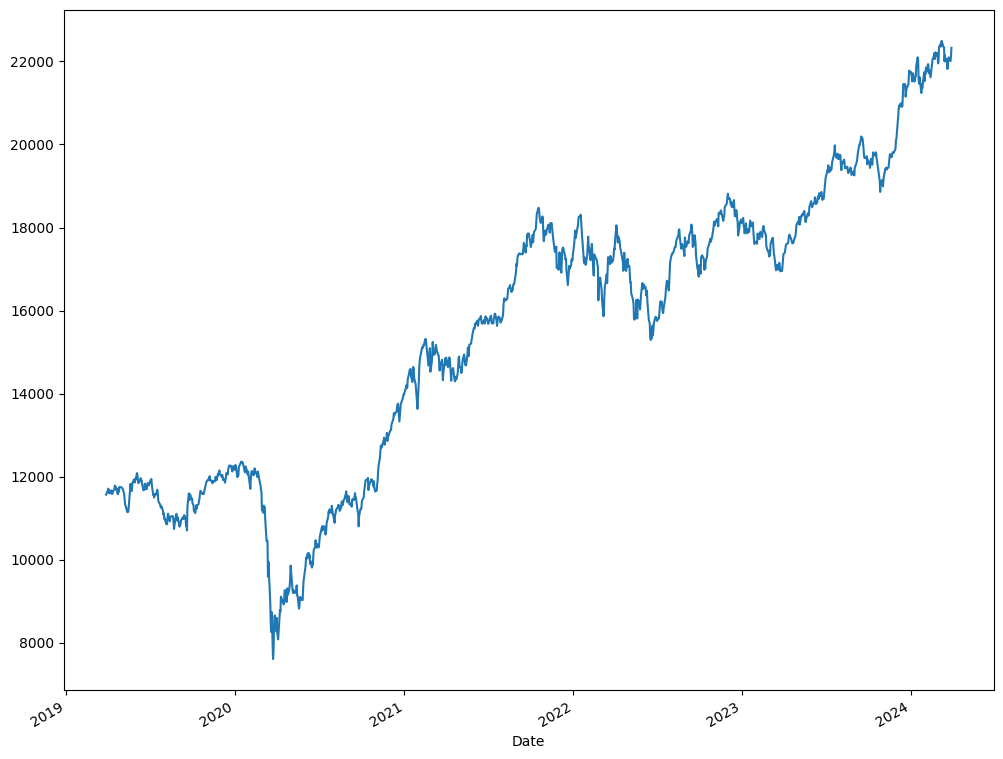

In [75]:
df['Adj Close'].plot()


In [76]:
output_var = pd.DataFrame(df['Adj Close'])
features = ['Open', 'High', 'Low', 'Volume']


In [77]:
scaler = MinMaxScaler()
feature_transform = scaler.fit_transform(df[features])
feature_transform= pd.DataFrame(columns=features, data=feature_transform, index=df.index)
feature_transform.head()

,Open,High,Low,Volume
Date,,,,
2019-03-28,0.252227,0.245109,0.264185,0.291386
2019-04-01,0.265861,0.255434,0.277075,0.209608
2019-04-02,0.268996,0.254830,0.277819,0.213197
2019-04-03,0.270603,0.257014,0.276029,0.201988
2019-04-04,0.265523,0.250220,0.271340,0.192711


In [78]:

timesplit= TimeSeriesSplit(n_splits=10)
for train_index, test_index in timesplit.split(feature_transform):
        X_train, X_test = feature_transform[:len(train_index)], feature_transform[len(train_index): (len(train_index)+len(test_index))]
        y_train, y_test = output_var[:len(train_index)].values.ravel(), output_var[len(train_index): (len(train_index)+len(test_index))].values.ravel()

In [79]:
trainX =np.array(X_train)
testX =np.array(X_test)
X_train = trainX.reshape(X_train.shape[0], 1, X_train.shape[1])
X_test = testX.reshape(X_test.shape[0], 1, X_test.shape[1])

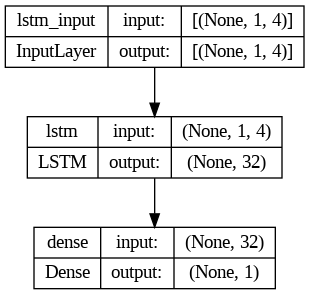

In [80]:
lstm = Sequential()
lstm.add(LSTM(32, input_shape=(1, trainX.shape[1]), activation='relu', return_sequences=False))
lstm.add(Dense(1))
lstm.compile(loss='mean_squared_error', optimizer='adam')
plot_model(lstm, show_shapes=True, show_layer_names=True)

In [81]:
history=lstm.fit(X_train, y_train, epochs=1000, batch_size=8, verbose=1, shuffle=False)

Epoch 1/1000
141/141 [==============================] - 3s 2ms/step - loss: 232507600.0000
Epoch 2/1000
141/141 [==============================] - 0s 2ms/step - loss: 232426416.0000
Epoch 3/1000
141/141 [==============================] - 0s 2ms/step - loss: 232227248.0000
Epoch 4/1000
141/141 [==============================] - 0s 2ms/step - loss: 231895920.0000
Epoch 5/1000
141/141 [==============================] - 0s 2ms/step - loss: 231452624.0000
Epoch 6/1000
141/141 [==============================] - 0s 2ms/step - loss: 230919344.0000
Epoch 7/1000
141/141 [==============================] - 0s 2ms/step - loss: 230308384.0000
Epoch 8/1000
141/141 [==============================] - 0s 2ms/step - loss: 229604784.0000
Epoch 9/1000
141/141 [==============================] - 0s 2ms/step - loss: 228812640.0000
Epoch 10/1000
141/141 [==============================] - 0s 2ms/step - loss: 227953280.0000
Epoch 11/1000
141/141 [==============================] - 0s 3ms/step - loss: 227034256.00

In [82]:
y_pred= lstm.predict(X_test)


4/4 [==============================] - 0s 3ms/step


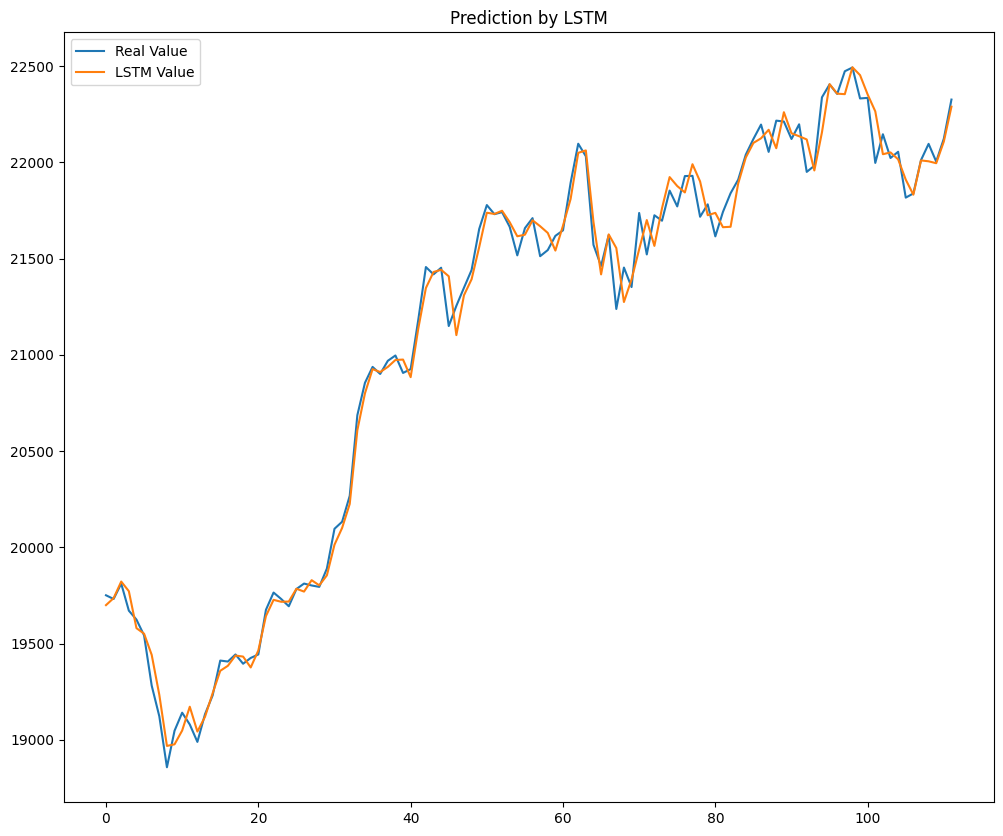

In [83]:
plt.plot(y_test, label='Real Value')
plt.plot(y_pred, label='LSTM Value')
plt.title('Prediction by LSTM')
plt.legend()
plt.show()

# ARIMA and SARIMAX


In [41]:
import yfinance as yf

In [42]:
df = yf.download("^NSEI", period="5y", interval="1d")
df

[*********************100%%**********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2019-03-28,11463.650391,11588.500000,11452.450195,11570.000000,11570.000000,527700
2019-04-01,11665.200195,11738.099609,11644.750000,11669.150391,11669.150391,379600
2019-04-02,11711.549805,11729.349609,11655.849609,11713.200195,11713.200195,386100
2019-04-03,11735.299805,11761.000000,11629.150391,11643.950195,11643.950195,365800
2019-04-04,11660.200195,11662.549805,11559.200195,11598.000000,11598.000000,349000
...,...,...,...,...,...,...
2024-03-21,21989.900391,22080.949219,21941.300781,22011.949219,22011.949219,353200
2024-03-22,21932.199219,22180.699219,21883.300781,22096.750000,22096.750000,388700
2024-03-26,21947.900391,22073.199219,21947.550781,22004.699219,22004.699219,328400


In [43]:
import matplotlib.pyplot as plt
import seaborn as sb
from statsmodels.tsa.arima.model import ARIMA
import warnings
warnings.filterwarnings('ignore')


In [44]:
df.reset_index(inplace = True)

In [45]:
df.dtypes

Date         datetime64[ns]
Open                float64
High                float64
Low                 float64
Close               float64
Adj Close           float64
Volume                int64
dtype: object

<Axes: >

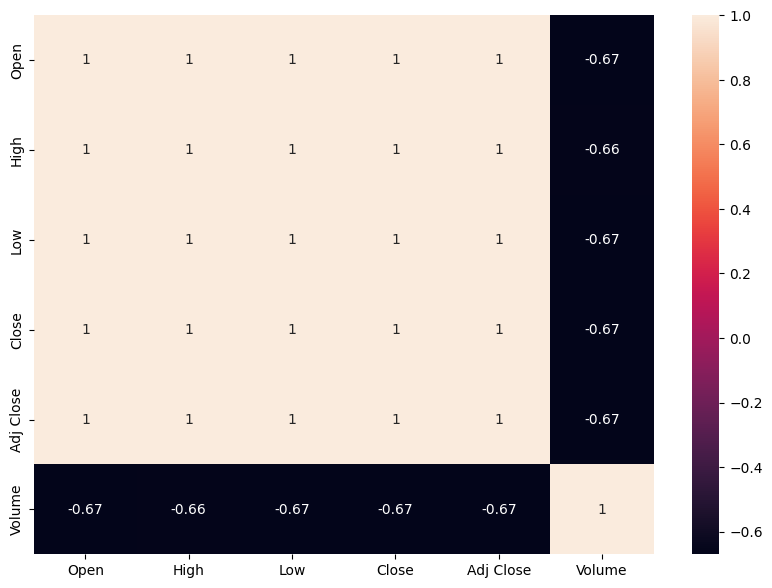

In [46]:
plt.figure(figsize = (10,7))
sb.heatmap(df.corr(),annot = True)

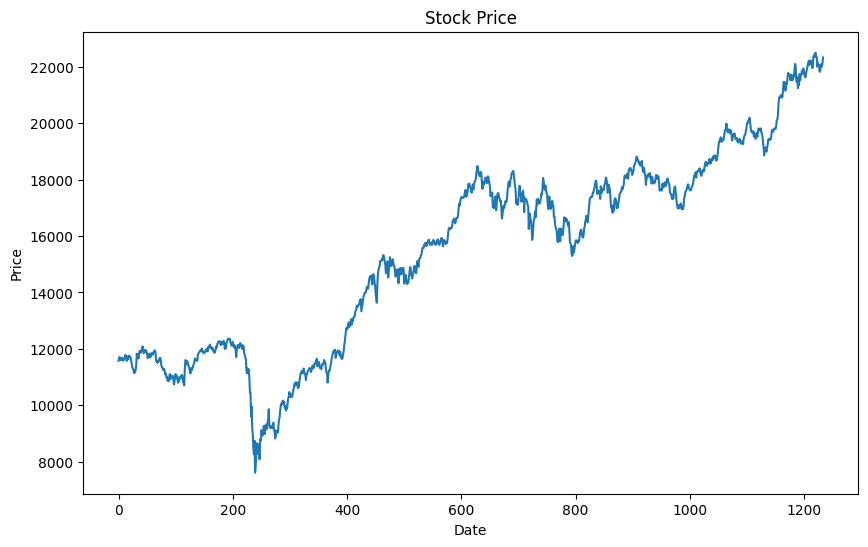

In [47]:
plt.figure(figsize=(10, 6))
plt.plot(df['Close'])
plt.title('Stock Price')
plt.xlabel('Date')
plt.ylabel('Price')
plt.show()

In [48]:
model = ARIMA(df['Close'], order=(1, 1, 1))
fitted_model = model.fit()


forecast_steps = 10
forecast = fitted_model.forecast(steps=forecast_steps)

print("Forecasted Prices:")
print(forecast)

Forecasted Prices:
1234    22327.512173
1235    22327.513103
1236    22327.513104
1237    22327.513104
1238    22327.513104
1239    22327.513104
1240    22327.513104
1241    22327.513104
1242    22327.513104
1243    22327.513104
Name: predicted_mean, dtype: float64


In [49]:
!pip install pmdarima
import pmdarima as pm
import statsmodels.api as sm
from statsmodels.tsa.stattools import adfuller, kpss
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.arima.model import ARIMA

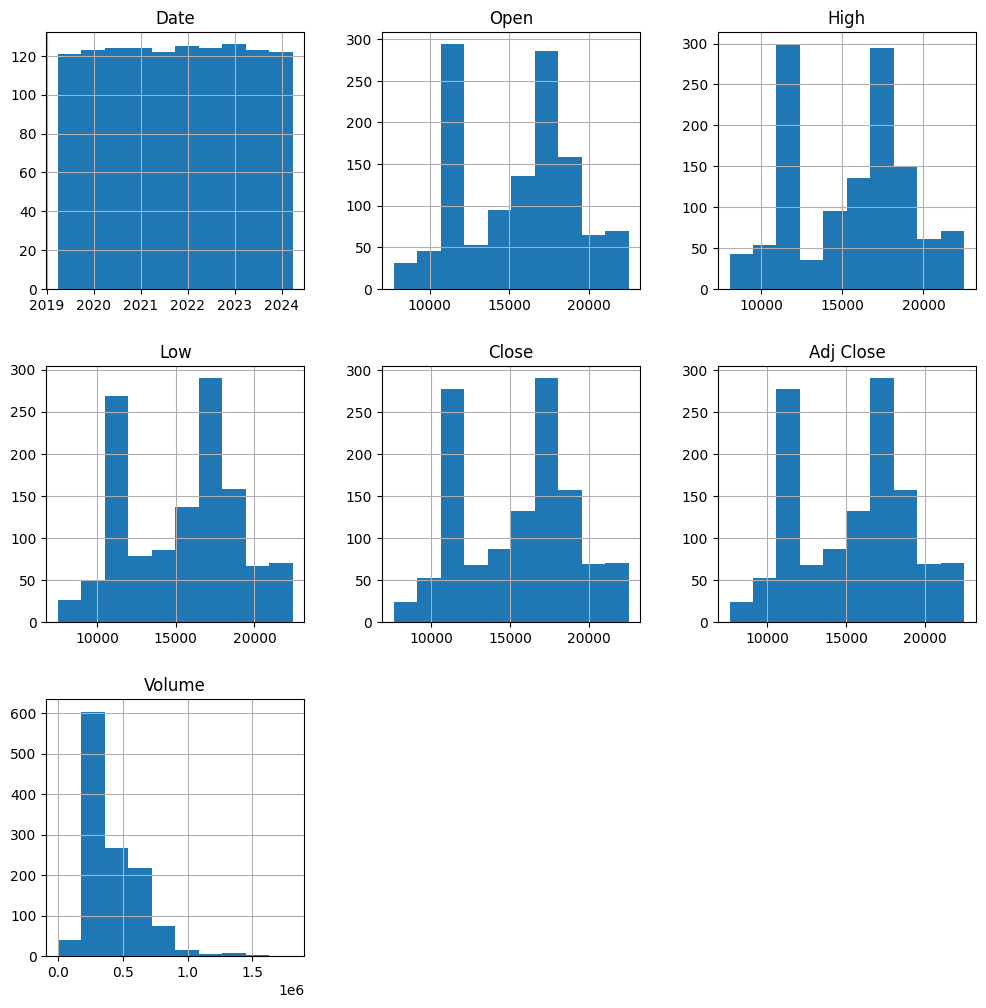

In [50]:
df.hist(figsize=(12,12))
plt.show()

In [51]:
import pandas as pd
pow = pd.Series(df['Close'].values, index=df['Date'])
pow

Date
2019-03-28    11570.000000
2019-04-01    11669.150391
2019-04-02    11713.200195
2019-04-03    11643.950195
2019-04-04    11598.000000
                  ...     
2024-03-21    22011.949219
2024-03-22    22096.750000
2024-03-26    22004.699219
2024-03-27    22123.650391
2024-03-28    22326.900391
Length: 1234, dtype: float64

In [52]:
print('Index frequency:', pd.infer_freq(pow.index))
print('Number of missing values:', pow.isnull().sum())

Index frequency: None
Number of missing values: 0


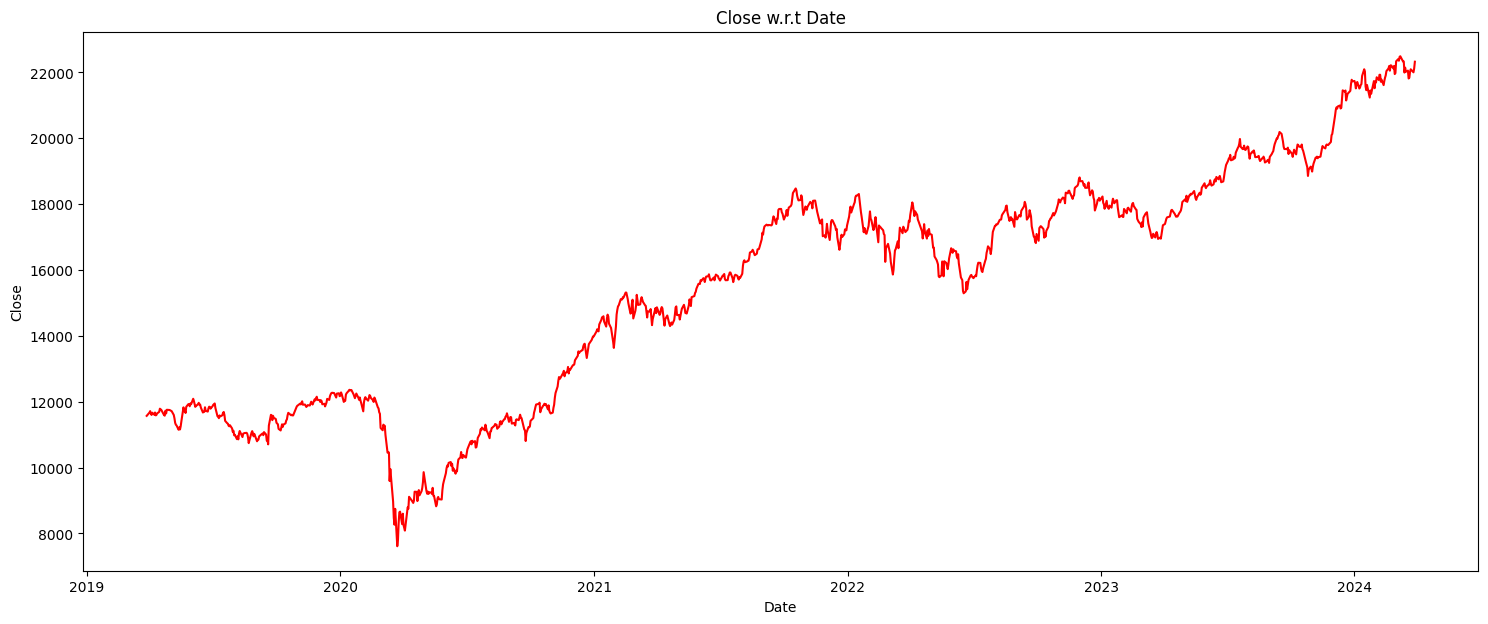

In [53]:
plt.figure(figsize=(18,7))
plt.plot(pow, linestyle='-', color='red')
plt.xlabel('Date')
plt.ylabel('Close')
plt.title('Close w.r.t Date')
plt.show()

In [54]:
def adf_test(timeseries):
    print("Results of Dickey-Fuller Test:")
    dftest = adfuller(timeseries, autolag="AIC")
    dfoutput = pd.Series(dftest[0:4], index=["Test Statistic", "p-value",
                                             "Lags Used", "Number of Observations Used"])
    for key, value in dftest[4].items():
        dfoutput["Critical Value (%s)" % key] = value
    print(dfoutput)

def kpss_test(timeseries):
    print("Results of KPSS Test:")
    kpsstest = kpss(timeseries, regression="c", nlags="auto")
    kpss_output = pd.Series(
        kpsstest[0:3], index=["Test Statistic", "p-value", "Lags Used"])
    for key, value in kpsstest[3].items():
        kpss_output["Critical Value (%s)" % key] = value
    print(kpss_output)

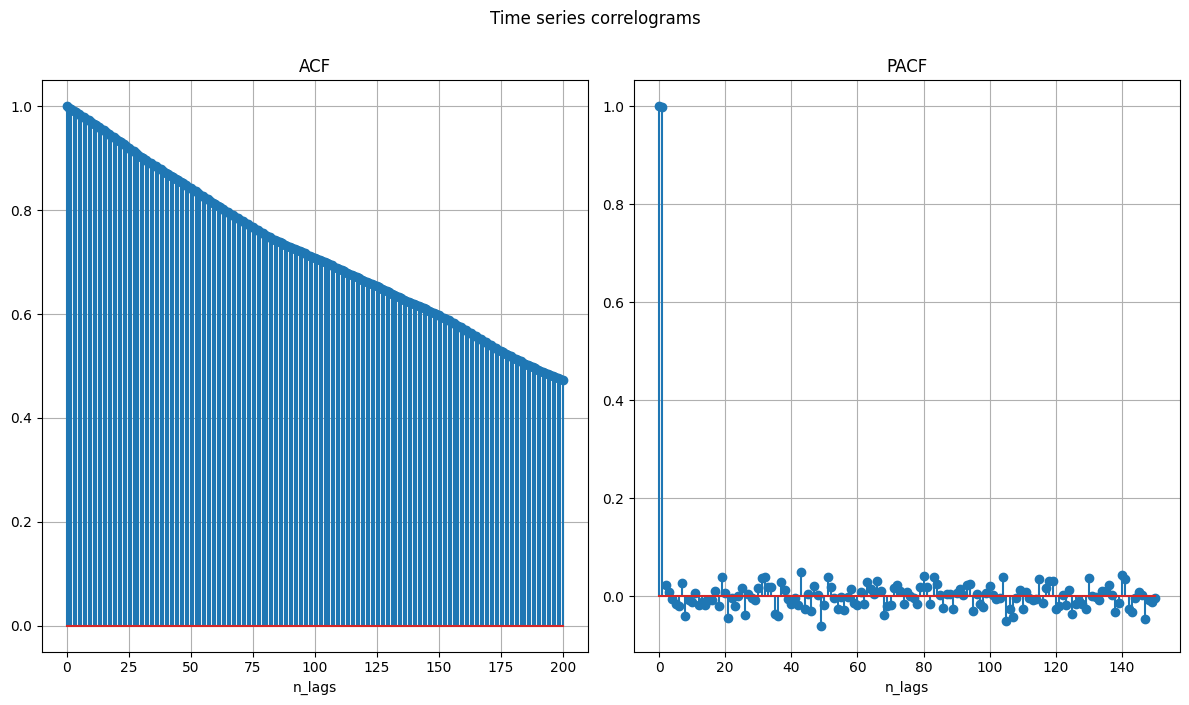

In [55]:
fas = sm.tsa.acf(pow, nlags=200)
fap = sm.tsa.pacf(pow, nlags=150)

fig, axs = plt.subplots(1, 2, figsize=(12,7))
fig.suptitle('Time series correlograms', y=1)
axs[0].stem(fas)
axs[0].set_title('ACF')
axs[0].set_xlabel('n_lags')
axs[0].grid(True)
axs[1].stem(fap)
axs[1].set_title('PACF')
axs[1].set_xlabel('n_lags')
axs[1].grid(True)
plt.tight_layout()
plt.show()

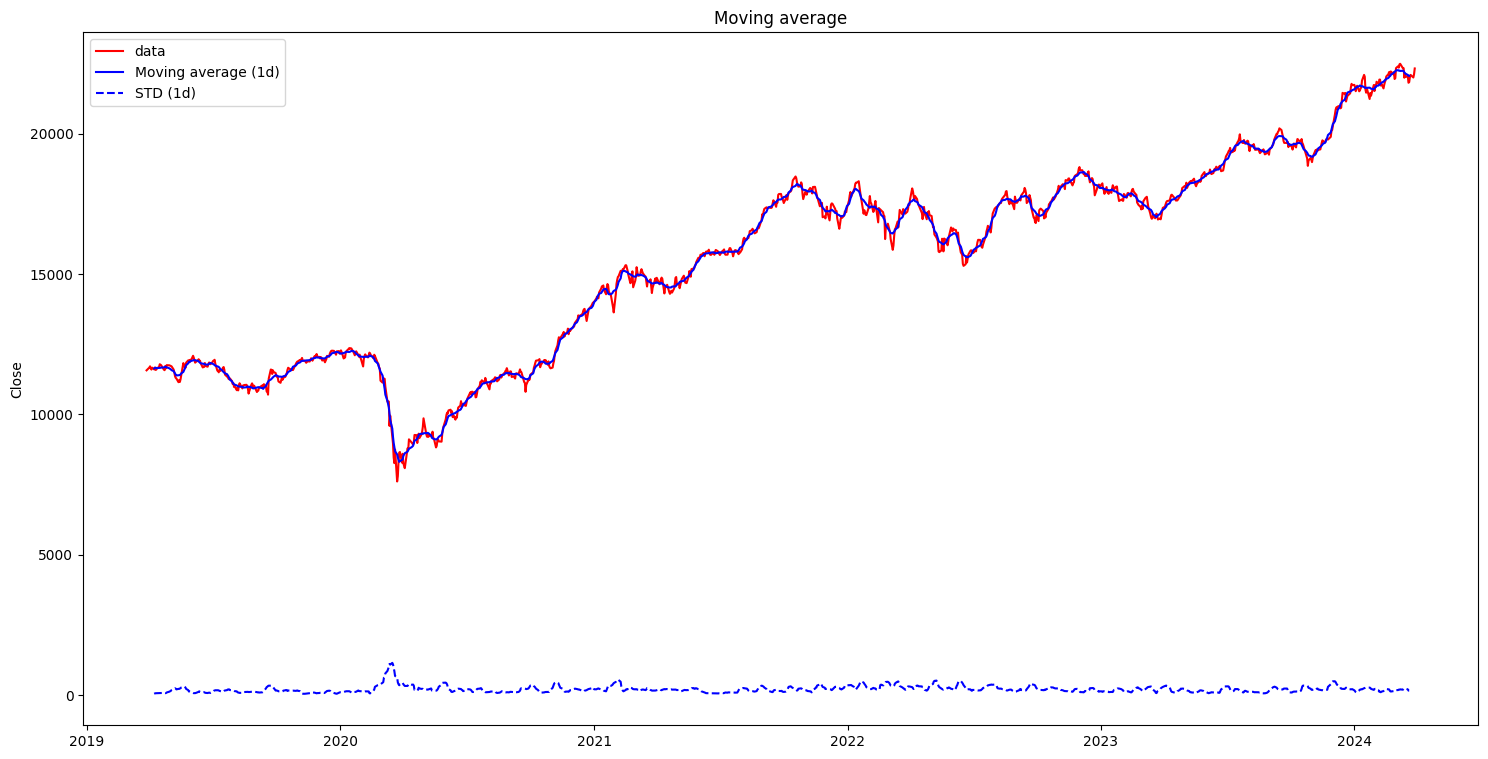

In [56]:
MMd = pow.rolling(12, center=True).mean()
STDd = pow.rolling(12, center=True).std()

plt.figure(figsize=(18,9))
plt.plot(pow, linestyle='-', color='red', alpha=1, label='data')
plt.plot(MMd, linestyle='-', color='b', label='Moving average (1d)')
plt.plot(STDd, linestyle='--', color='b', label='STD (1d)')
plt.ylabel('Close')
plt.title('Moving average', y=1)
plt.legend()
plt.show()

In [57]:
adf_test(pow)
print('\nDifferentiations needed according to ADF:', pm.arima.utils.ndiffs(pow, test='adf'))
print('\n')
kpss_test(pow)
print('\nDifferentiations needed according to KPSS:', pm.arima.utils.ndiffs(pow, test='kpss'))

Results of Dickey-Fuller Test:
Test Statistic                   -0.070279
p-value                           0.952320
Lags Used                         7.000000
Number of Observations Used    1226.000000
Critical Value (1%)              -3.435695
Critical Value (5%)              -2.863900
Critical Value (10%)             -2.568027
dtype: float64

Differentiations needed according to ADF: 1


Results of KPSS Test:
Test Statistic            5.340464
p-value                   0.010000
Lags Used                20.000000
Critical Value (10%)      0.347000
Critical Value (5%)       0.463000
Critical Value (2.5%)     0.574000
Critical Value (1%)       0.739000
dtype: float64

Differentiations needed according to KPSS: 1


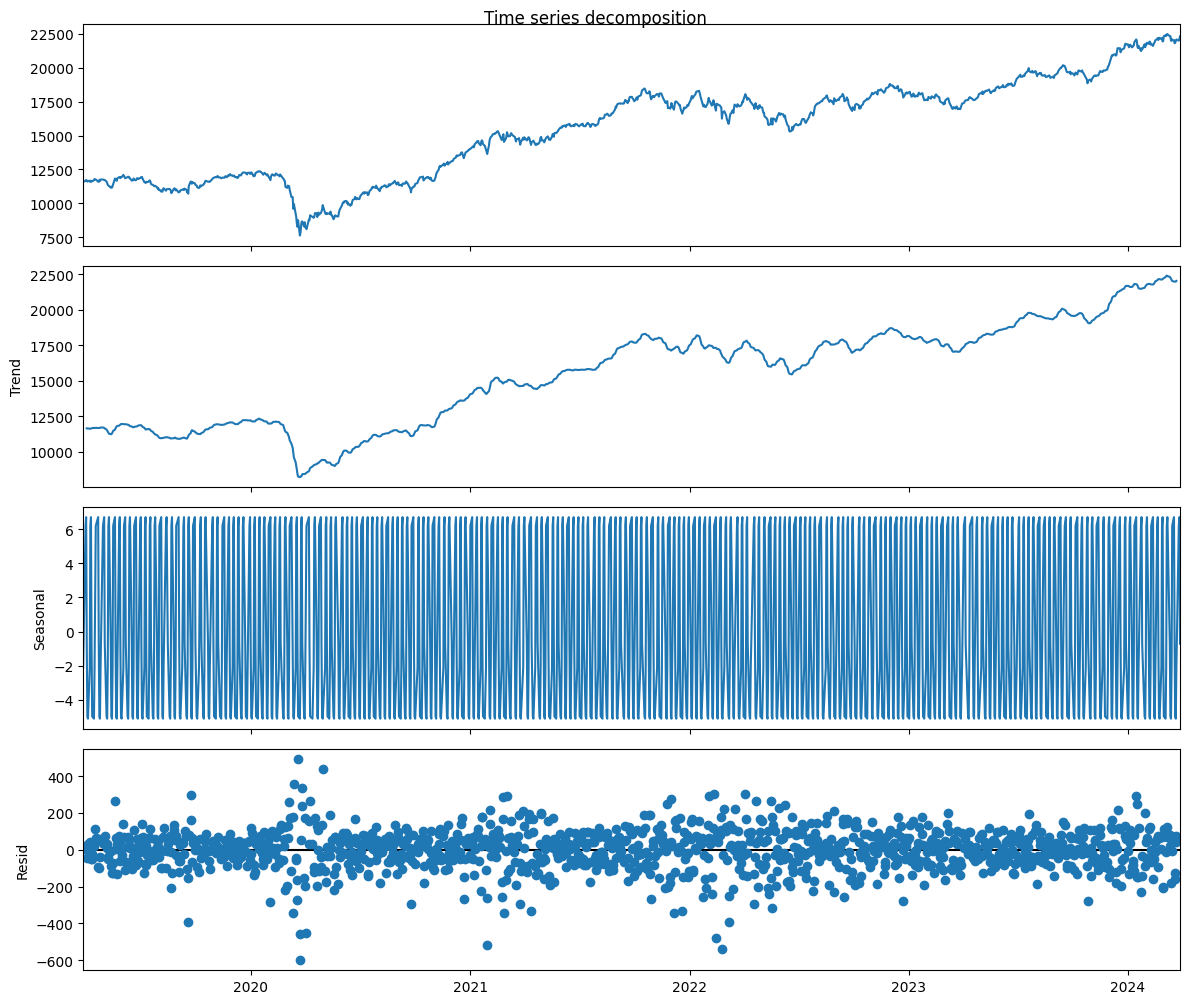

In [58]:
descomposicion_d = seasonal_decompose(pow, model='aditive', period=6)

plt.rcParams.update({'figure.figsize': (12,10)})
descomposicion_d.plot().suptitle('Time series decomposition', y = 1)
plt.show()

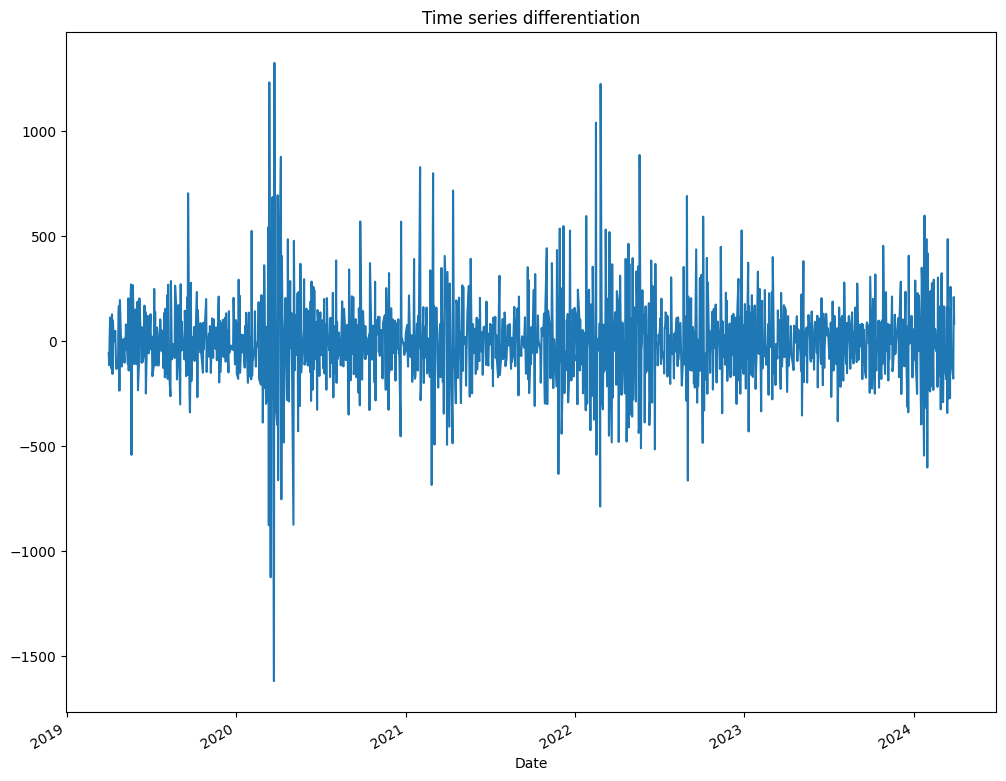

In [59]:
dif = sm.tsa.statespace.tools.diff(pow, k_diff=1, k_seasonal_diff=1, seasonal_periods=1)

dif.plot()
plt.title('Time series differentiation')
plt.show()



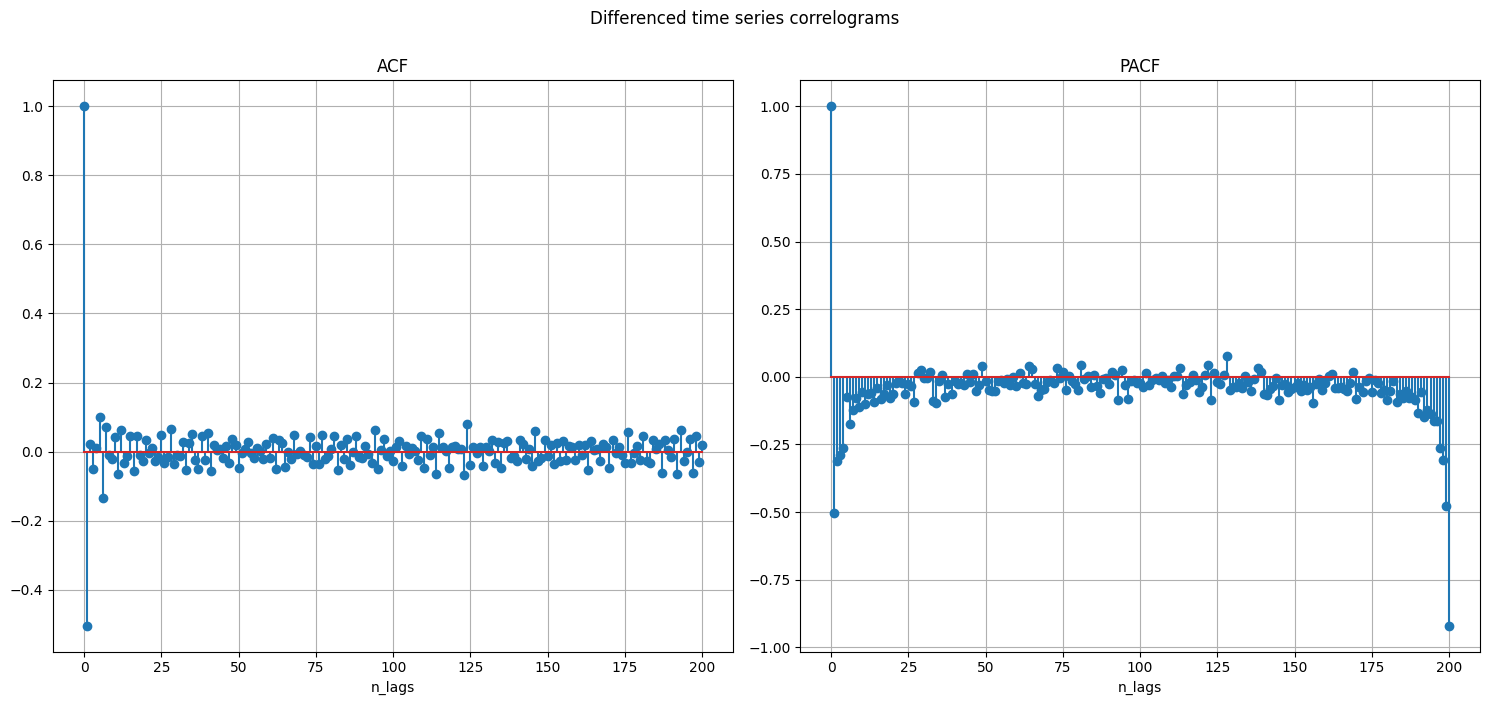

In [60]:
fas_dif = sm.tsa.acf(dif, nlags=200)
fap_dif = sm.tsa.pacf(dif, nlags=200)

fig, axs = plt.subplots(1, 2, figsize=(15,7))
fig.suptitle('Differenced time series correlograms', y=1)
axs[0].stem(fas_dif)
axs[0].set_title('ACF')
axs[0].set_xlabel('n_lags')
axs[0].grid(True)
axs[1].stem(fap_dif)
axs[1].set_title('PACF')
axs[1].set_xlabel('n_lags')
axs[1].grid(True)
plt.tight_layout()
plt.show()

In [61]:
train = pow[:'2023-9-29']
test = pow['2023-9-30':]

In [62]:
train

Date
2019-03-28    11570.000000
2019-04-01    11669.150391
2019-04-02    11713.200195
2019-04-03    11643.950195
2019-04-04    11598.000000
                  ...     
2023-09-25    19674.550781
2023-09-26    19664.699219
2023-09-27    19716.449219
2023-09-28    19523.550781
2023-09-29    19638.300781
Length: 1114, dtype: float64

In [63]:
test

Date
2023-10-03    19528.750000
2023-10-04    19436.099609
2023-10-05    19545.750000
2023-10-06    19653.500000
2023-10-09    19512.349609
                  ...     
2024-03-21    22011.949219
2024-03-22    22096.750000
2024-03-26    22004.699219
2024-03-27    22123.650391
2024-03-28    22326.900391
Length: 120, dtype: float64

In [64]:
model = ARIMA(pow, order = (1,1,1), seasonal_order=(1,1,1,6))
model = model.fit(low_memory=True)
print('ARIMA model summary\n', model.summary())

ARIMA model summary
                                     SARIMAX Results                                    
Dep. Variable:                               y   No. Observations:                 1234
Model:             ARIMA(1, 1, 1)x(1, 1, 1, 6)   Log Likelihood               -7960.767
Date:                         Sat, 30 Mar 2024   AIC                          15931.535
Time:                                 10:12:49   BIC                          15957.096
Sample:                                      0   HQIC                         15941.153
                                        - 1234                                         
Covariance Type:                        approx                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.9147      0.072     12.702      0.000       0.774       1.056
ma.L1         -0.8948      0.079    -1

In [65]:
pred = model.get_prediction()

In [66]:
pred = model.get_prediction()

In [67]:
pred_train = pred.predicted_mean[:'2023-9-29']
pred_test = pred.predicted_mean['2023-9-30':]

In [68]:
pred_conf_int = pred.conf_int()

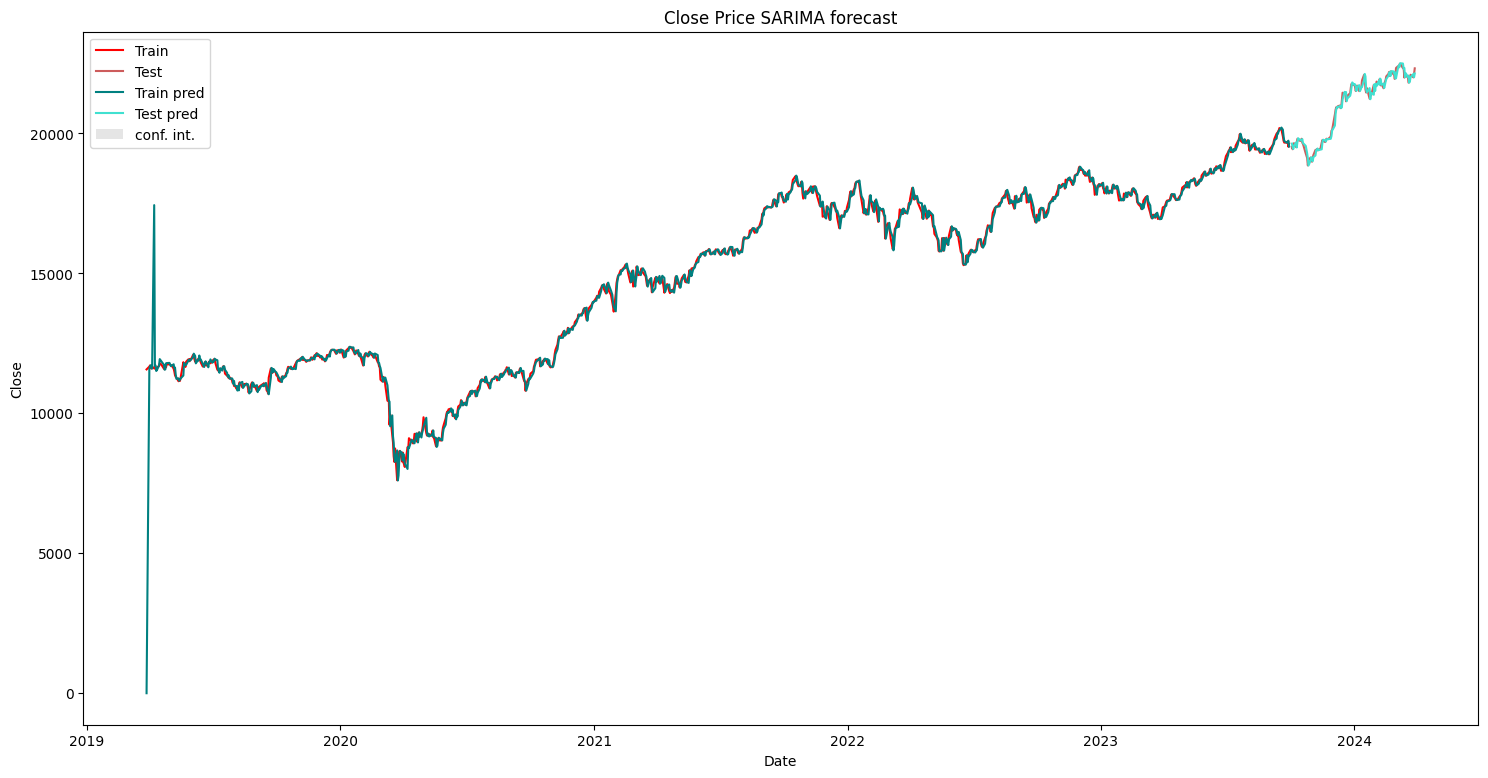

In [69]:
plt.figure(figsize=(18,9))
plt.plot(train, color='red', linestyle='-', label='Train')
plt.plot(test, color='indianred', linestyle='-', label='Test')
plt.plot(pred_train, color='teal', linestyle='-', label='Train pred')
plt.plot(pred_test, color='turquoise', linestyle='-', label='Test pred')
plt.fill_between(pred_conf_int.index, pred_conf_int['lower y'], pred_conf_int['upper y'], color='k', alpha=0.1, label='conf. int.', edgecolor=None)
plt.xlabel('Date')
plt.ylabel('Close')
plt.title('Close Price SARIMA forecast')
plt.legend()
plt.show()

In [70]:
err = pow - pred.predicted_mean
err

Date
2019-03-28    11570.000000
2019-04-01       96.912324
2019-04-02       42.395001
2019-04-03      -70.303718
2019-04-04      -46.364156
                  ...     
2024-03-21      144.116559
2024-03-22       86.883083
2024-03-26     -119.469802
2024-03-27      115.438526
2024-03-28      184.034250
Length: 1234, dtype: float64

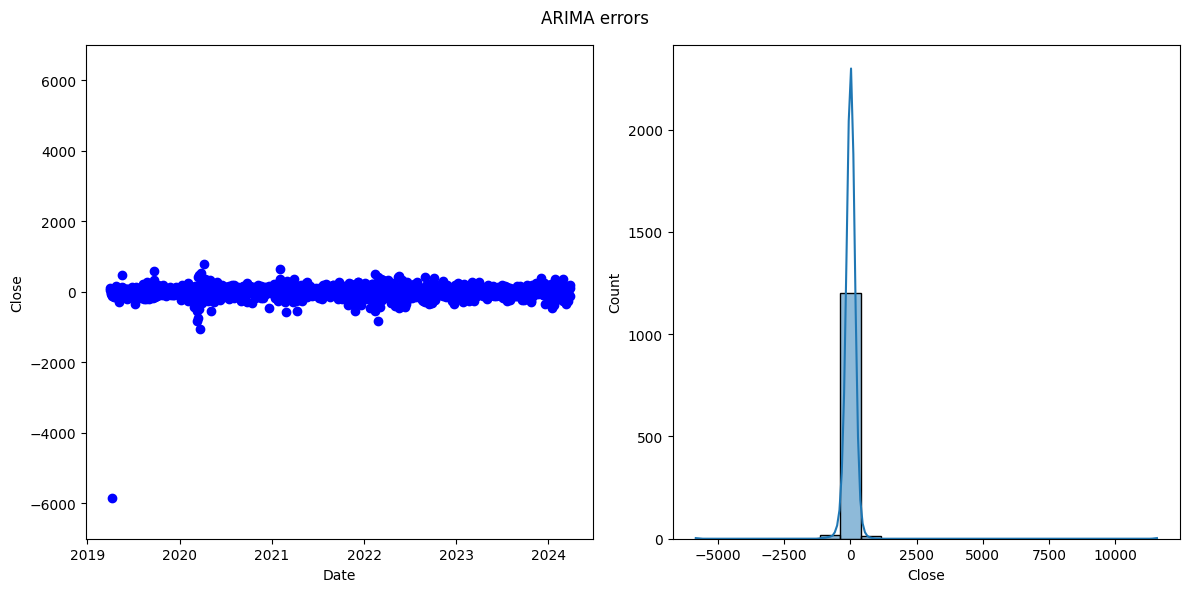

In [71]:

fig, (err1, err2) = plt.subplots(1, 2, figsize=(12,6))
fig.suptitle('ARIMA errors')
err1.plot(err, 'bo')
err1.set_ylim([-7000,7000])
err1.set_xlabel('Date')
err1.set_ylabel('Close')
sb.histplot(err, bins=13, kde=True, ax=err2, binrange=(-5000,5000))
err2.set_xlabel('Close')
plt.tight_layout()
plt.show()